<a href="https://colab.research.google.com/github/anmolkys/Military-Aircraft-Classifier/blob/main/Military_Aircraft_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
!pip install -q kaggle
!pip install -q kaggle-cli

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 kB 17.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for lxml
ERROR: Could not build wheels for lxml, which is required to install pyproject.toml-based projects


In [ ]:
import os
os.environ["KAGGLE_USERNAME"]="anmolkys"
os.environ["KAGGLE_KEY"]="faac8ea10b3c9a56a1d2bcb4639c5ada"

In [ ]:
!kaggle datasets download -d a2015003713/militaryaircraftdetectiondataset

100% 10.8G/10.8G [06:03<00:00, 34.4MB/s]
100% 10.8G/10.8G [06:03<00:00, 31.8MB/s]


In [ ]:
!unzip /content/militaryaircraftdetectiondataset.zip/crop

In [ ]:
!pip install fastai

In [ ]:
from fastai.vision.all import *

In [ ]:
images = get_image_files(Path('/content/crop'))

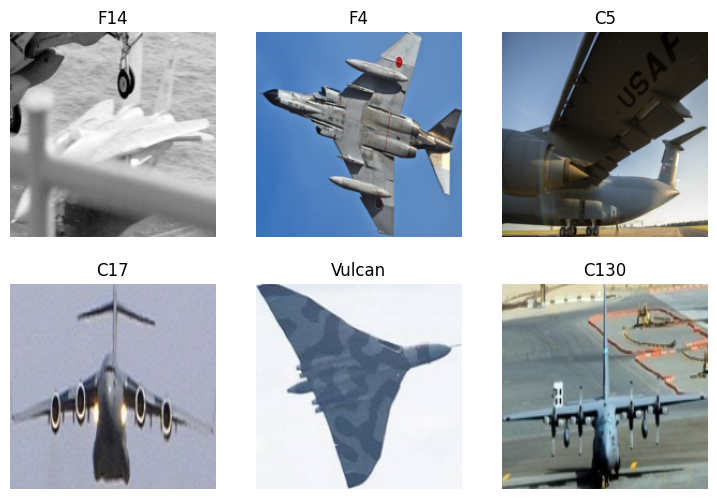

In [ ]:
dls=DataBlock(
blocks=(ImageBlock,CategoryBlock),
get_items=get_image_files,
splitter=RandomSplitter(valid_pct=0.2,seed=42),
get_y=parent_label,
item_tfms=[Resize(192,method='squish')]
).dataloaders(Path('/content/crop'))

dls.show_batch(max_n=6)

In [ ]:
learn=vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 58.6MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,3.238133,2.236768,0.593409,03:40


epoch,train_loss,valid_loss,error_rate,time
0,1.776456,1.292481,0.365594,03:26
1,0.899632,1.085228,0.305656,03:24


In [ ]:
def craft(x):
    type_craft,_,probs=learn.predict(PILImage.create(x))
    print(f"This is a {type_craft}")
    print(f"Probability of being wrong is {probs[0]:.4f}")

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Sukhoi_Design_Bureau%2C_054%2C_Sukhoi_Su-57_%2849581303977%29.jpg/800px-Sukhoi_Design_Bureau%2C_054%2C_Sukhoi_Su-57_%2849581303977%29.jpg

--2023-10-04 19:56:41--  https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Sukhoi_Design_Bureau%2C_054%2C_Sukhoi_Su-57_%2849581303977%29.jpg/800px-Sukhoi_Design_Bureau%2C_054%2C_Sukhoi_Su-57_%2849581303977%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.59.240, 2a02:ec80:300:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.59.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64610 (63K) [image/jpeg]
Saving to: ‘800px-Sukhoi_Design_Bureau,_054,_Sukhoi_Su-57_(49581303977).jpg’

800px-Sukhoi_Design 100%[===================>]  63.10K  --.-KB/s    in 0.005s  

2023-10-04 19:56:41 (12.3 MB/s) - ‘800px-Sukhoi_Design_Bureau,_054,_Sukhoi_Su-57_(49581303977).jpg’ saved [64610/64610]



In [ ]:
craft('/content/800px-Sukhoi_Design_Bureau,_054,_Sukhoi_Su-57_(49581303977).jpg')

This is a Su57
Probability of being wrong is 0.0001


In [ ]:
!wget https://airforce-technology.com/wp-content/uploads/sites/6/2023/01/Image-2-Su-57-Felon.jpg

--2023-10-04 19:58:19--  https://airforce-technology.com/wp-content/uploads/sites/6/2023/01/Image-2-Su-57-Felon.jpg
Resolving airforce-technology.com (airforce-technology.com)... 151.101.130.133, 151.101.66.133, 151.101.194.133, ...
Connecting to airforce-technology.com (airforce-technology.com)|151.101.130.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78414 (77K) [image/jpeg]
Saving to: ‘Image-2-Su-57-Felon.jpg’

Image-2-Su-57-Felon 100%[===================>]  76.58K  --.-KB/s    in 0.007s  

2023-10-04 19:58:19 (10.2 MB/s) - ‘Image-2-Su-57-Felon.jpg’ saved [78414/78414]



In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/MQ-9_Reaper_UAV_%28cropped%29.jpg/1280px-MQ-9_Reaper_UAV_%28cropped%29.jpg

--2023-10-04 19:59:46--  https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/MQ-9_Reaper_UAV_%28cropped%29.jpg/1280px-MQ-9_Reaper_UAV_%28cropped%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.59.240, 2a02:ec80:300:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.59.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142799 (139K) [image/jpeg]
Saving to: ‘1280px-MQ-9_Reaper_UAV_(cropped).jpg’

1280px-MQ-9_Reaper_ 100%[===================>] 139.45K  --.-KB/s    in 0.01s   

2023-10-04 19:59:46 (11.2 MB/s) - ‘1280px-MQ-9_Reaper_UAV_(cropped).jpg’ saved [142799/142799]



In [ ]:
craft('/content/1280px-MQ-9_Reaper_UAV_(cropped).jpg')

This is a MQ9
Probability of being wrong is 0.1724
